In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../Data/train.csv")

In [3]:
df.head()

id   b1   b11   b12   b2    b3   b4    b5    b6    b7    b8  b8_a    b9  \
0   2002  293  1927  1038  278   475  453   987  1773  2184  1900  2343  3039   
1   3212  197  1598   697  201   347  228   682  1982  2449  2254  2685  2690   
2  13312  929  1975  1031  982  1020  856  1220  2051  2421  2392  2671  2683   
3  17020  132  1560   689  189   408  175   609  2117  2907  3024  3005  2955   
4   5967  241  1944  1131  362   538  487   918  1549  1844  1702  2077  2043   

  nforest_type  
0          MDF  
1          DDF  
2          MDF  
3          MDF  
4          MDF

In [4]:
df[df["nforest_type"] == "MDF"].describe()


id           b1          b11          b12           b2  \
count   5865.000000  5865.000000  5865.000000  5865.000000  5865.000000   
mean    8573.159761   361.555840  1899.192157   966.516113   414.680477   
std     4910.649058   312.275357   325.290733   262.112506   322.187141   
min        6.000000     0.000000   371.000000   154.000000     1.000000   
25%     4286.000000   185.000000  1678.000000   776.000000   228.000000   
50%     8541.000000   250.000000  1907.000000   934.000000   295.000000   
75%    12895.000000   413.000000  2123.000000  1125.000000   469.000000   
max    17051.000000  2616.000000  4110.000000  3590.000000  2480.000000   

                b3           b4           b5           b6           b7  \
count  5865.000000  5865.000000  5865.000000  5865.000000  5865.000000   
mean    604.626257   467.078772   932.333163  2100.767093  2569.092413   
std     296.766032   305.725238   306.676770   367.364224   465.167028   
min      98.000000    53.000000   138.000000   519.000000   726.000000   
25%     422.000000   259.000000   712.000000  1846.000000  2243.000000   
50%     513.000000   364.000000   862.000000  2079.000000  2534.000000   
75%     707.000000   580.000000  1109.000000  2339.000000  2866.000000   
max    2554.000000  2504.000000  3105.000000  3978.000000  4940.000000   

                b8         b8_a           b9  
count  5865.000000  5865.000000  5865.000000  
mean   2656.595226  2863.444160  2881.280648  
std     512.642611   487.694071   443.845932  
min     706.000000   750.000000   786.000000  
25%    2308.000000  2522.000000  2578.000000  
50%    2630.000000  2840.000000  2855.000000  
75%    2983.000000  3173.000000  3163.000000  
max    4848.000000  5027.000000  8329.000000

In [5]:
df[df["nforest_type"] == "DDF"].describe()

id           b1          b11          b12           b2  \
count   4603.000000  4603.000000  4603.000000  4603.000000  4603.000000   
mean    8436.769064   354.792092  1760.115794   888.106452   397.896372   
std     4911.598353   293.879195   311.220387   269.634447   299.745613   
min        0.000000     1.000000   444.000000   225.000000    56.000000   
25%     4158.500000   185.000000  1523.000000   688.500000   220.000000   
50%     8393.000000   246.000000  1738.000000   849.000000   282.000000   
75%    12628.500000   404.000000  1963.500000  1034.000000   451.500000   
max    17050.000000  2578.000000  3834.000000  4994.000000  2286.000000   

                b3           b4           b5           b6           b7  \
count  4603.000000  4603.000000  4603.000000  4603.000000  4603.000000   
mean    577.138388   448.159244   905.995221  1974.522051  2380.743645   
std     281.141319   282.705124   299.254115   342.391425   407.880901   
min     163.000000   100.000000   258.000000   593.000000   725.000000   
25%     392.000000   252.000000   679.000000  1740.000000  2093.000000   
50%     475.000000   357.000000   813.000000  1926.000000  2336.000000   
75%     692.000000   557.000000  1104.500000  2190.500000  2631.000000   
max    2668.000000  2470.000000  2907.000000  3669.000000  4123.000000   

                b8         b8_a           b9  
count  4603.000000  4603.000000  4603.000000  
mean   2464.089507  2663.191180  2679.282425  
std     430.511165   426.753863   401.139767  
min     641.000000   756.000000   962.000000  
25%    2172.000000  2369.000000  2402.000000  
50%    2418.000000  2620.000000  2637.000000  
75%    2726.500000  2930.500000  2924.500000  
max    4581.000000  4469.000000  6079.000000

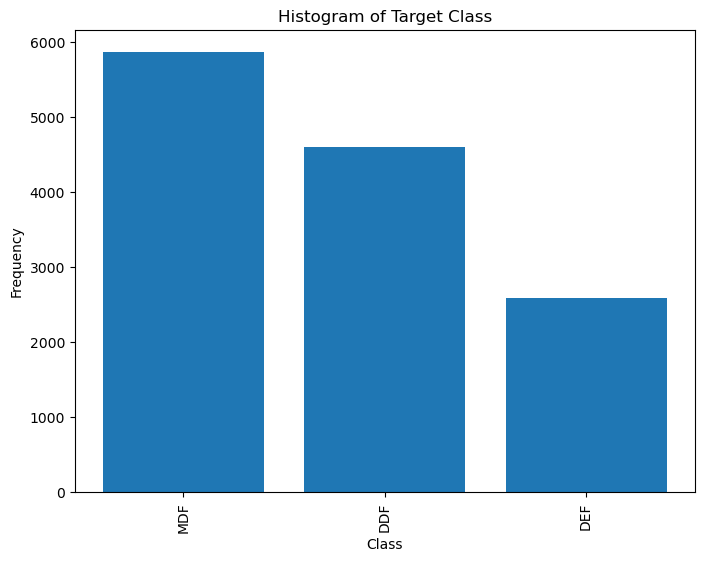

In [6]:
import matplotlib.pyplot as plt

# Get the frequency of each class
class_counts = df['nforest_type'].value_counts()

# Create the histogram
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Target Class')
plt.xticks(rotation=90)
plt.show()

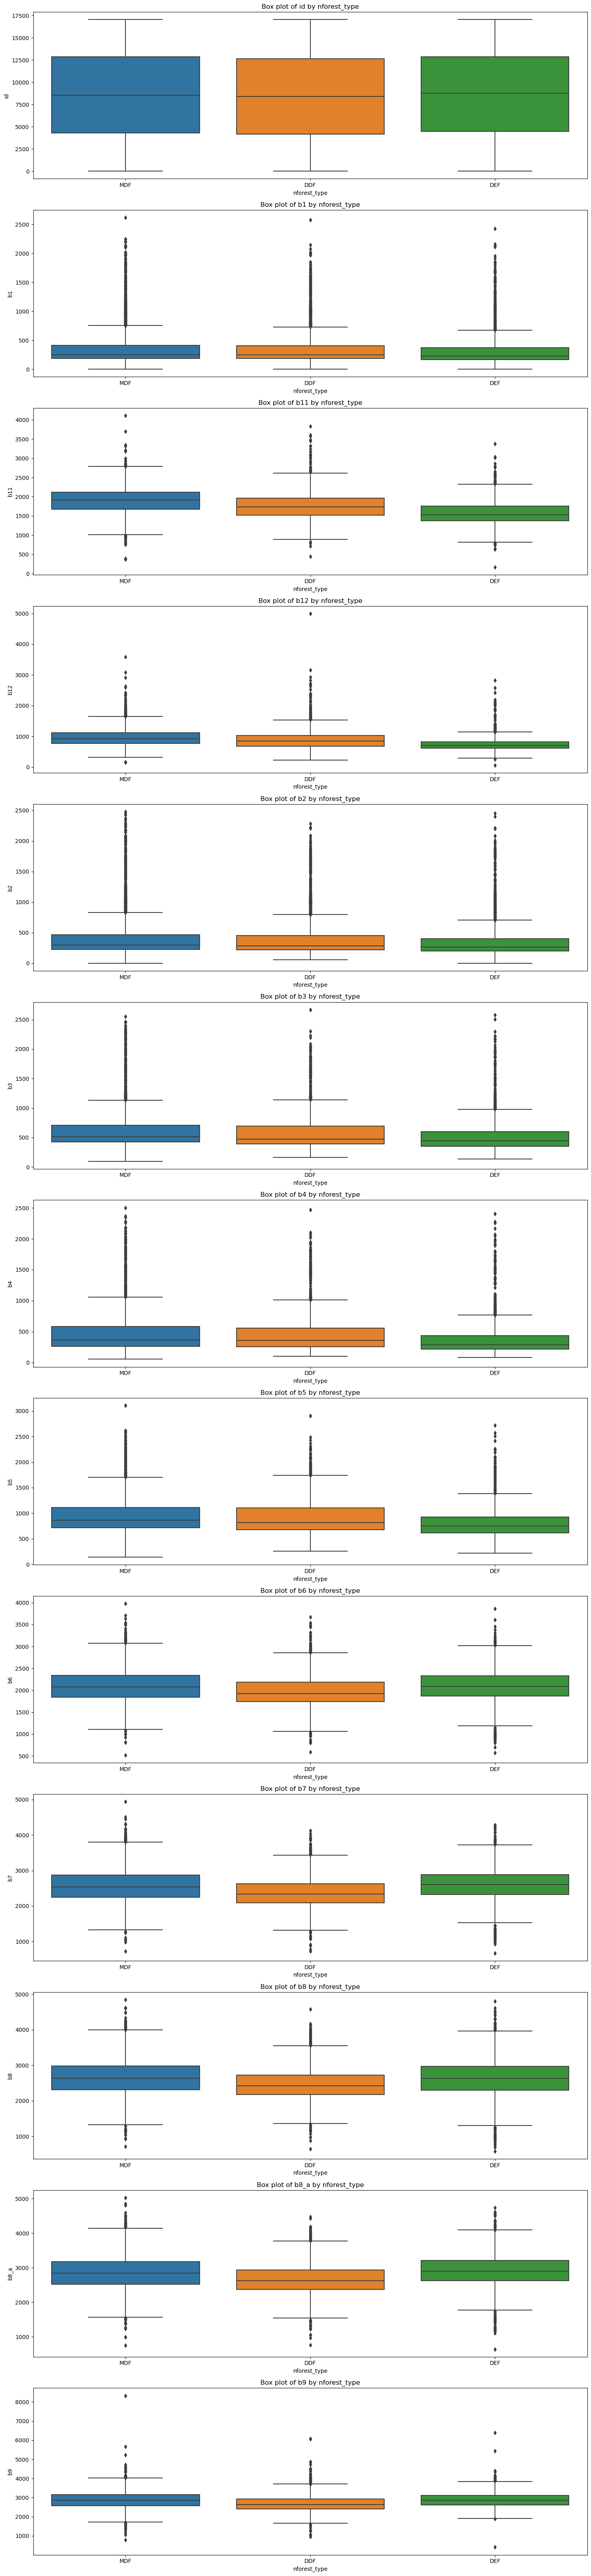

In [7]:
00

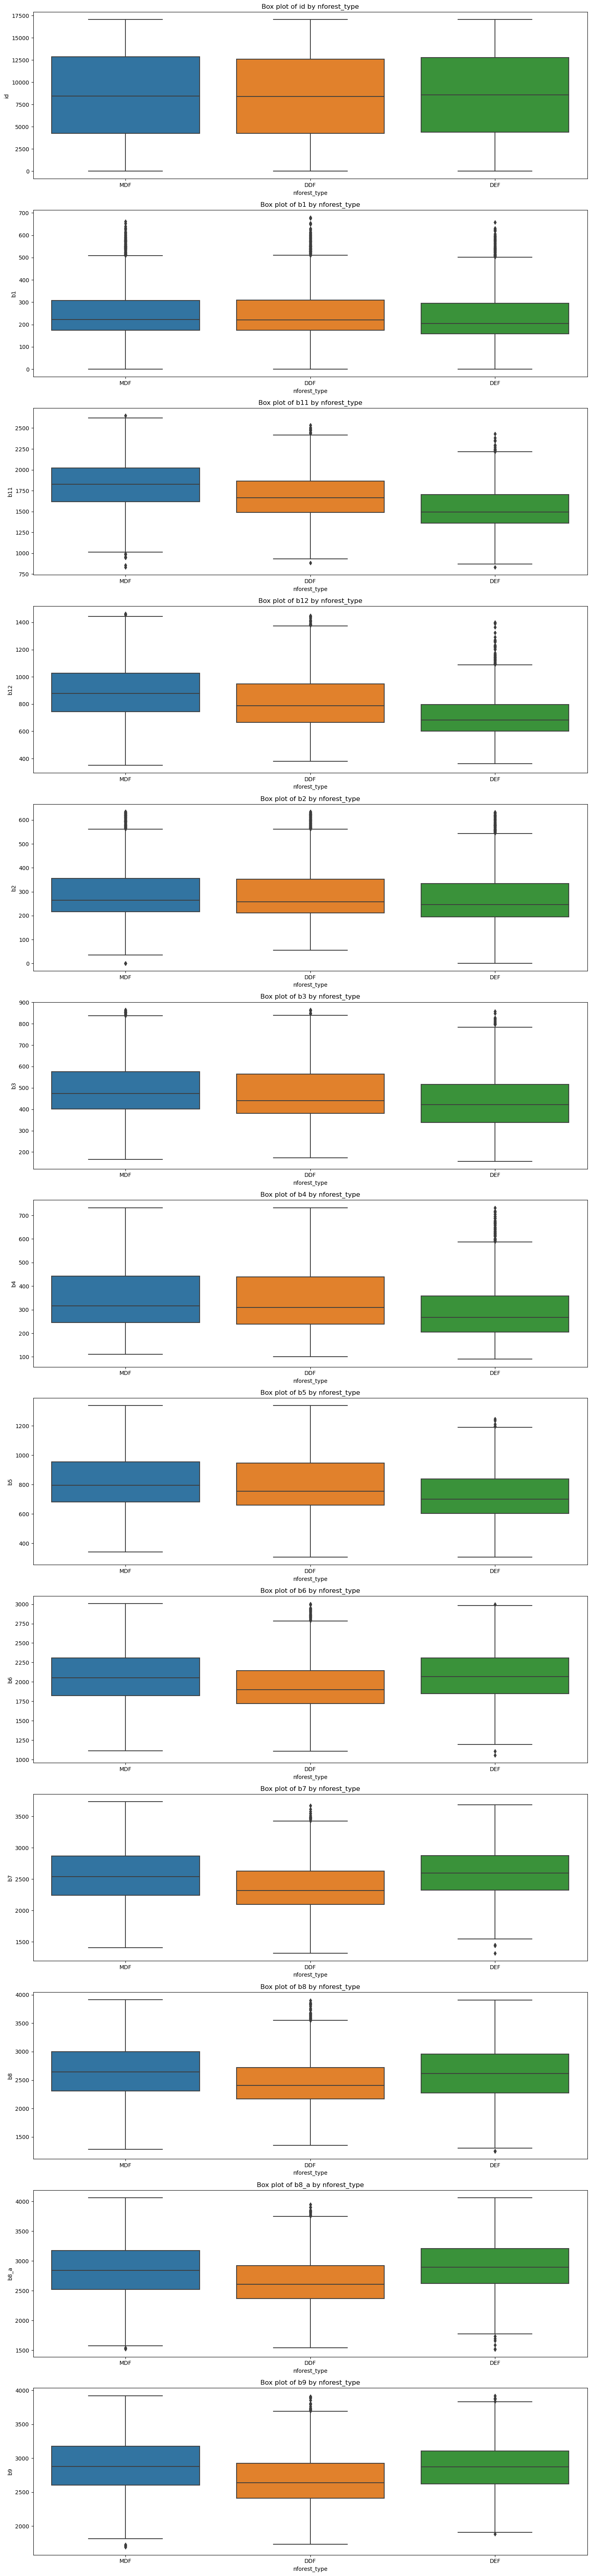

In [8]:
# Assuming df is your DataFrame and 'target' is the name of the target column
target_column = 'nforest_type'  # Replace with your actual target column name

# Function to remove outliers based on IQR
def remove_outliers(df, feature_columns):
    for col in feature_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Get the list of feature columns
feature_columns = [col for col in df.columns if col != target_column]

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, feature_columns)

# Set up the matplotlib figure
plt.figure(figsize=(15, len(feature_columns) * 5))

# Create a box plot for each feature
for i, feature in enumerate(feature_columns):
    plt.subplot(len(feature_columns), 1, i + 1)
    sns.boxplot(x=target_column, y=feature, data=df_cleaned)
    plt.title(f'Box plot of {feature} by {target_column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
df_cleaned.shape

(10508, 14)

In [10]:
df_cleaned["nforest_type"] = df_cleaned["nforest_type"].map({'MDF': 0, 'DDF':1, 'DEF': 2})

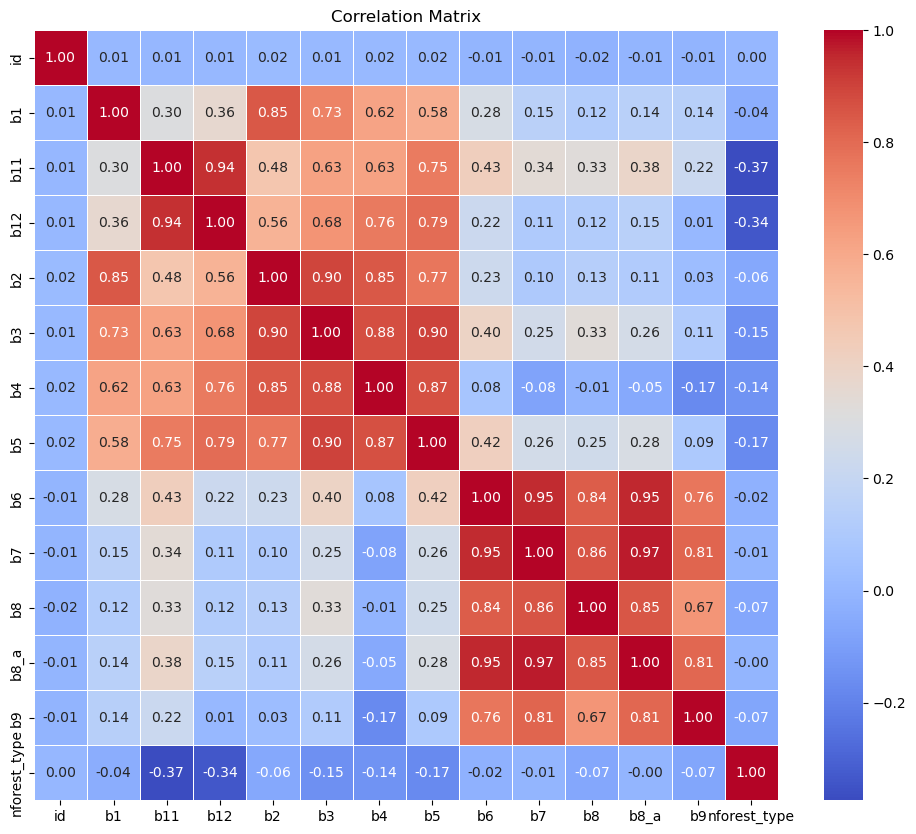

In [11]:

# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [12]:
df_cleaned_new = df_cleaned.drop(columns=["b1", "b5", "b12", "b4", "b2", "id", "b8_a", "b7", "b6"])

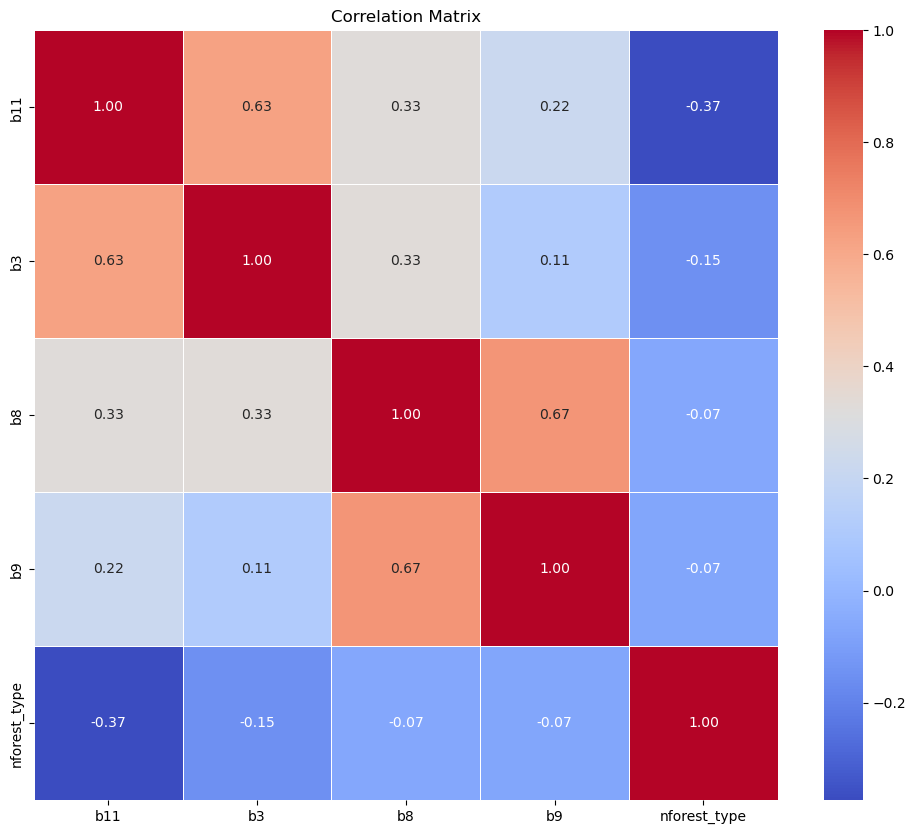

In [13]:

# Compute the correlation matrix
correlation_matrix = df_cleaned_new.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


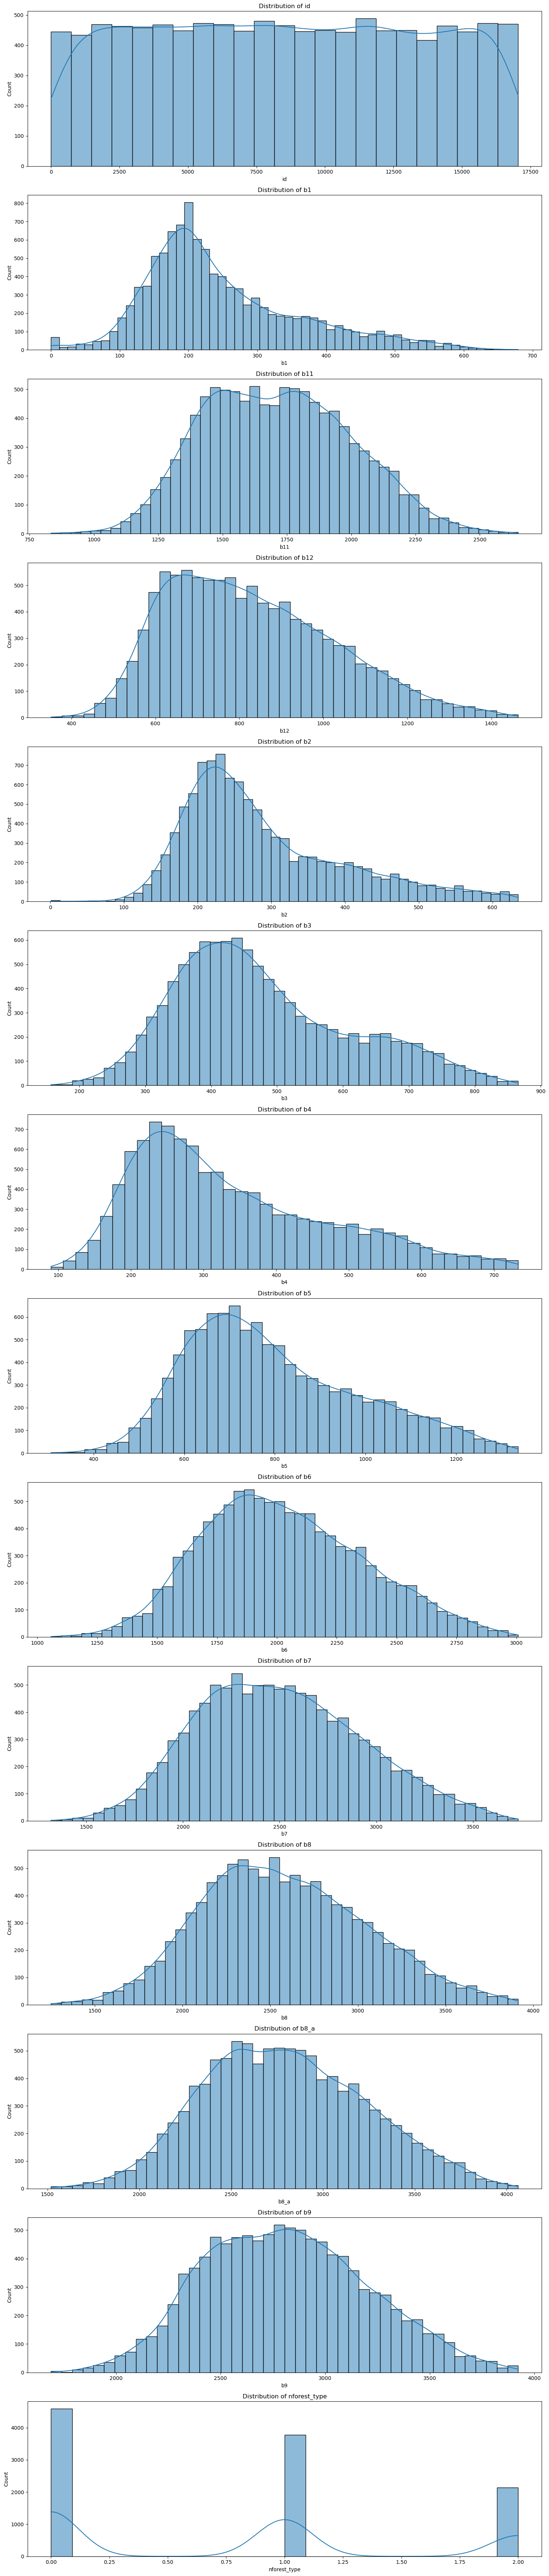

In [14]:

# Set up the matplotlib figure
plt.figure(figsize=(15, len(df_cleaned.columns) * 5))

# Create a distribution plot for each column
for i, column in enumerate(df_cleaned.columns):
    plt.subplot(len(df_cleaned.columns), 1, i + 1)
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
features_df = pd.read_csv("../Data/new_train_no_dupes.csv")

In [16]:
features_df = features_df.drop( columns = ["id"])
features_df["nforest_type"] = features_df["nforest_type"].map({'MDF': 0, 'DDF':1, 'DEF': 2})
target = features_df["nforest_type"]
features_df = features_df.drop(columns=["nforest_type"])
features_df.insert(0, "nforest_type", target)

In [17]:
features_df.head()

nforest_type   b1   b11   b12   b2    b3   b4    b5    b6    b7  ...  \
0             0  293  1927  1038  278   475  453   987  1773  2184  ...   
1             1  197  1598   697  201   347  228   682  1982  2449  ...   
2             0  929  1975  1031  982  1020  856  1220  2051  2421  ...   
3             0  132  1560   689  189   408  175   609  2117  2907  ...   
4             0  241  1944  1131  362   538  487   918  1549  1844  ...   

   Chlorophyll_Index_Green  Chlorophyll_Green  \
0                -0.518744           0.708633   
1                -0.491202           0.726368   
2                -0.163934           0.038697   
3                -0.330049           1.158730   
4                -0.413943           0.486188   

   Canopy_Chlorophyll_Content_Index    BWDRVI     ARVI2      ARVI       ARI  \
0                          0.781006  0.074472  0.503165  0.412451  0.001092   
1                          0.889413  0.083625  0.796732  0.686706  0.001416   
2                          0.482648  0.041790  0.532351  0.326779  0.000161   
3                          0.895050  0.088235  0.898901  0.803536  0.000809   
4                          0.688827  0.064922  0.471046  0.358789  0.000769   

   Alteration_Index  AFVI_2100  Adjusted_TSAVI  
0          3.937583   0.037452       -0.150281  
1          4.187956   0.263939       -0.381403  
2          1.501499   0.448565       -0.229597  
3          3.767169   0.321115       -0.633802  
4          3.416667   0.039978       -0.182600  

[5 rows x 126 columns]

In [18]:
# # Compute the correlation matrix
# correlation_matrix = features.corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(500, 500))a

# # Draw the heatmap
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
# plt.title('Correlation Matrix')
# plt.savefig('correlation_matrix.png', format='png')

In [19]:
import numpy as np

high_correlation_threshold = 0.8
corr_matrix = features_df.corr().abs()

# Create a mask to ignore self-correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Find pairs of features with high correlation
high_correlation_pairs = [
    (col1, col2)
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and corr_matrix.loc[col1, col2] > high_correlation_threshold
]

# Drop one feature from each pair of highly correlated features
features_to_drop = set()
for col1, col2 in high_correlation_pairs:
    if col1 not in features_to_drop and col2 not in features_to_drop:
        features_to_drop.add(col2)  # Drop the second feature in the pair

features = features_df.drop(features_to_drop, axis=1)
print("Dropped features with high correlation to each other:", features_to_drop)


Dropped features with high correlation to each other: {'ND_860_1640', 'SIPI1', 'ND_MIR_NIR', 'b12', 'b8', 'GARI', 'SR_Red_Green', 'AFVI_2100', 'SR_550_800', 'ND_550_650', 'SAVI2', 'SR_1650_2218', 'Vegetation_Index_700', 'SQRT_IR_R', 'TSAVI', 'ND_NIR_SWIR', 'NDVI_690_710', 'ARI', 'VARI_G', 'Simple_Ratio_700', 'NDGR', 'b8_a', 'Normalized_Difference_Red_Green', 'ND_895_675', 'Intensity', 'TCAR', 'Gossan', 'ND_550_450', 'SR_710_670', 'b3', 'MSAVI', 'Tasselled_Cap_Vegetation', 'b2', 'Soil_Brightness_Index_MSS', 'NDSI', 'Log_Ratio', 'SR_860_708', 'b4', 'SARVI3', 'Simple_Ratio_NIR_700_715', 'Chlorophyll_Index_RedEdge', 'TVI', 'b7', 'Alteration_Index', 'RDVI', 'ND_833_658', 'Tasselled_Cap_Brightness', 'Normalized_Difference_800_2170', 'GOSAVI', 'Laterite', 'Normalized_Difference_780_550', 'OSAVI', 'Transformed_NDVI', 'MCARI2', 'Simple_Ratio_NIR_MIR', 'SR_Red_NIR', 'BWDRVI', 'Simple_Ratio_NIR_G', 'Misra_Non_Such_Index', 'CRI700', 'SR_800_470', 'ARVI2', 'ND_NIR_Rededge', 'Chlorophyll_Green', 'b5

In [20]:
features.shape

(13053, 29)

In [21]:
# Compute the correlation matrix
correlation_matrix = features.corr()

# Correlation with target variable
target_column = 'nforest_type'  # Replace with your actual target column name
target_correlation = correlation_matrix[target_column].abs().sort_values(ascending=False)

print("Correlation of each feature with the target variable:\n", target_correlation)


Correlation of each feature with the target variable:
 nforest_type                              1.000000
b11                                       0.361817
SR_SWIRI_NIR                              0.243522
Soil_Composition_Index                    0.204031
TC_Non_Such_Index_MSS                     0.184821
Inverse_Reflectance_700                   0.181410
Soil_Background_Line                      0.150075
TCI                                       0.145034
Modified_Anthocyanin_Reflectance_Index    0.139111
WDRVI                                     0.114921
REIP3                                     0.114819
SR_774_677                                0.081989
MCARI_OSAVI                               0.065456
SR_450_550                                0.057601
b9                                        0.050462
Maccioni                                  0.048358
Tasselled_Cap_Wetness                     0.043742
SR_NIR_Rededge                            0.041551
b6                         

In [22]:
low_correlation_threshold = 0.01
features_to_drop = target_correlation[target_correlation < low_correlation_threshold].index



In [23]:
df_reduced = features.drop(features_to_drop, axis=1)
print("Dropped features with low correlation to the target:", features_to_drop.tolist())

Dropped features with low correlation to the target: ['EVI', 'REIP2']


In [24]:
df_reduced.shape

(13053, 27)

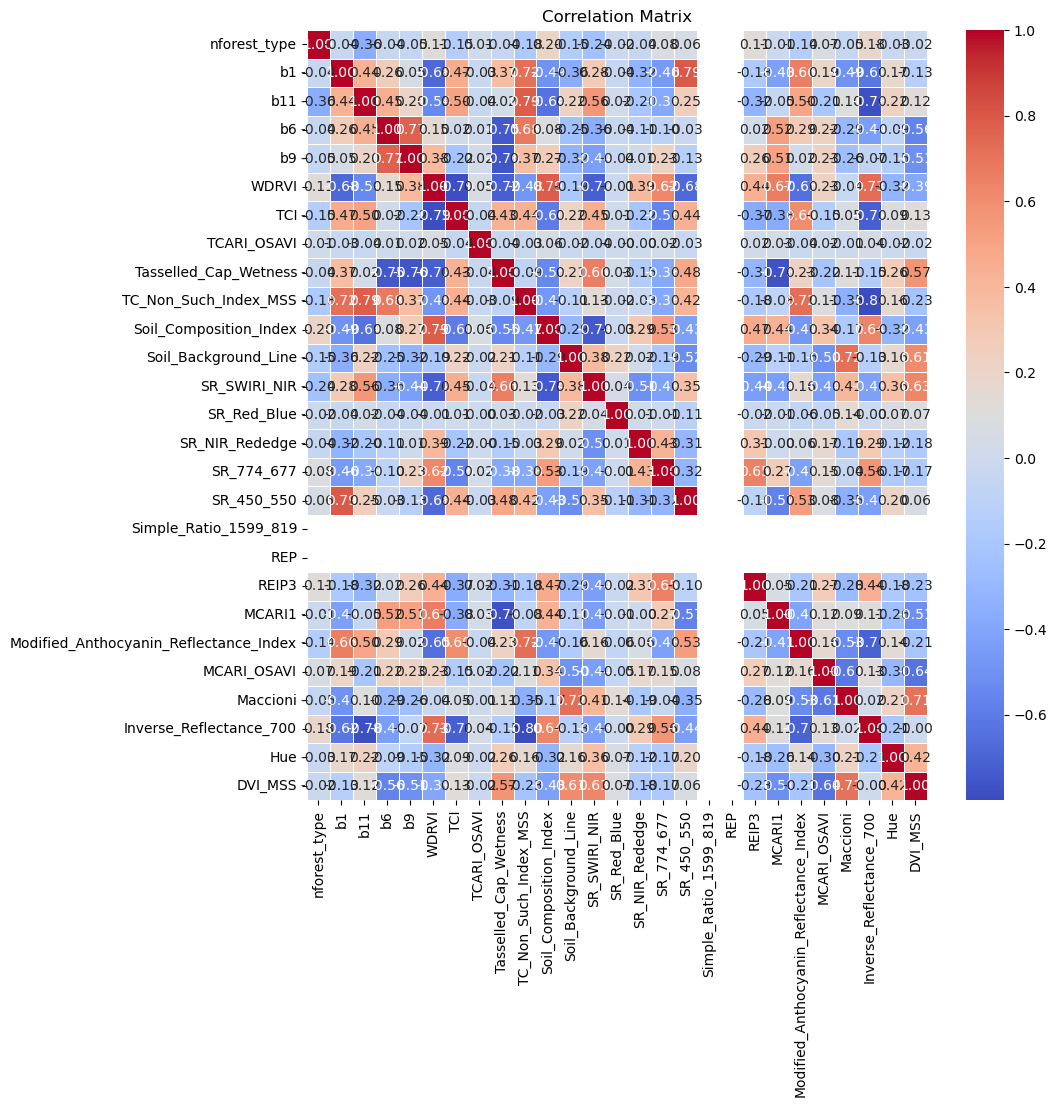

In [25]:
# Compute the correlation matrix
correlation_matrix = df_reduced.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

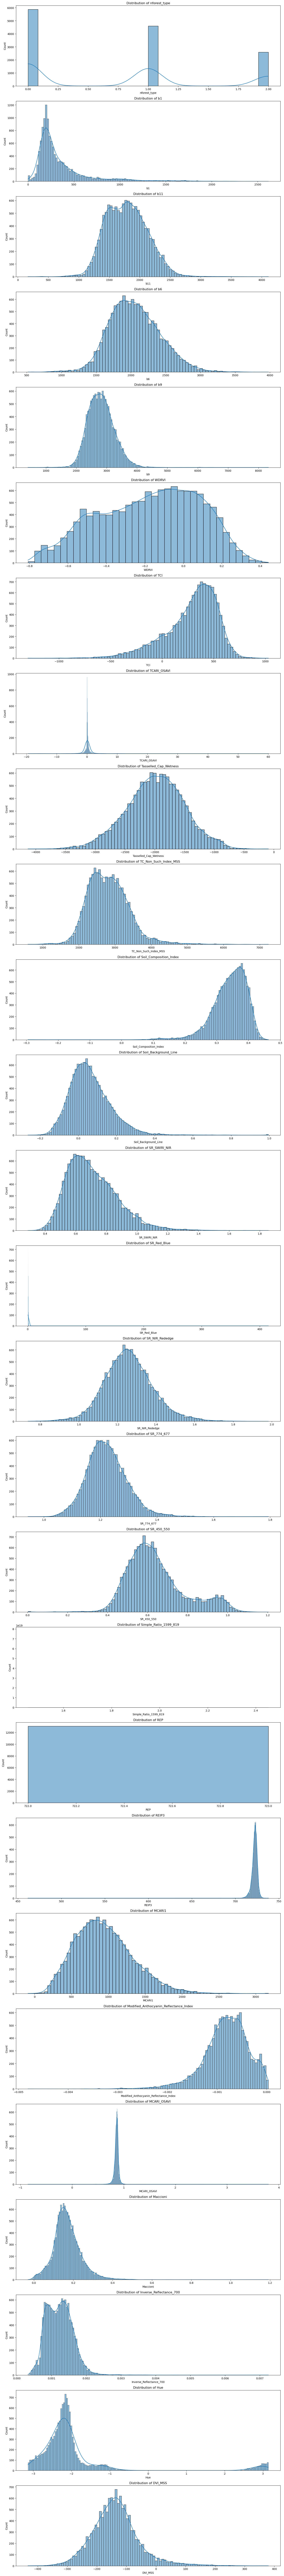

In [26]:

# Set up the matplotlib figure
plt.figure(figsize=(15, len(df_reduced.columns) * 5))

# Create a distribution plot for each column
for i, column in enumerate(df_reduced.columns):
    plt.subplot(len(df_reduced.columns), 1, i + 1)
    sns.histplot(df_reduced[column], kde=True)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
df_reduced.shape

(13053, 27)

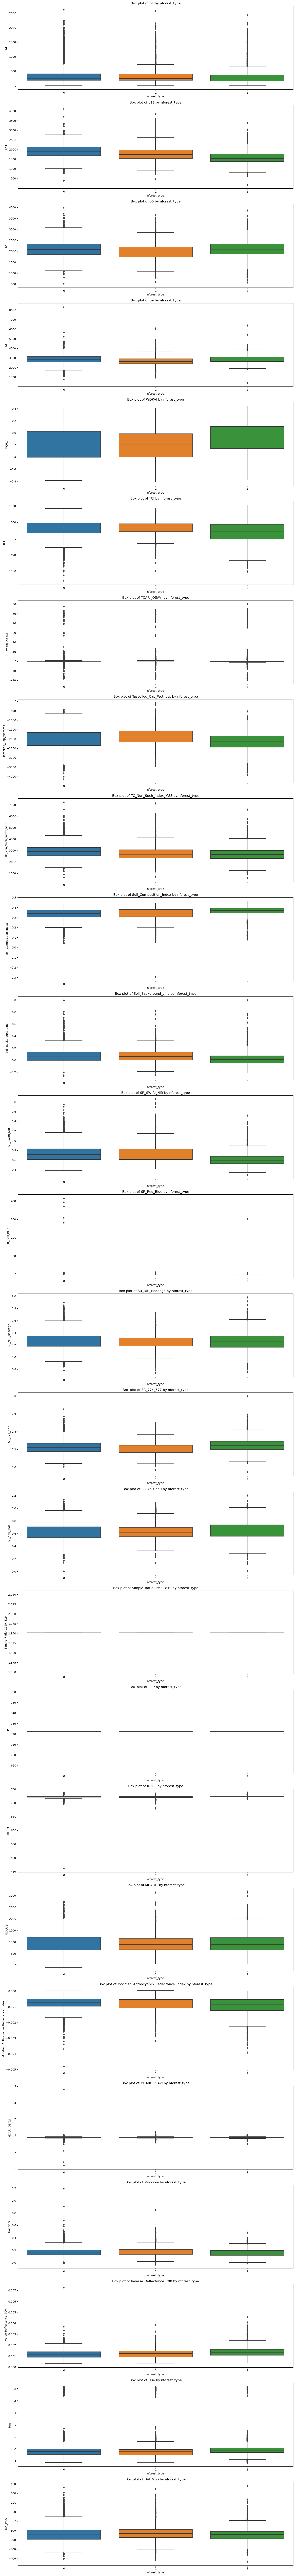

In [28]:
# Assuming df_reduced is your DataFrame and 'target' is the name of the target column
target_column = 'nforest_type'  # Replace with your actual target column name

# Get the list of feature columns
feature_columns = [col for col in df_reduced.columns if col != target_column]

# Set up the matplotlib figure
plt.figure(figsize=(15, len(feature_columns) * 5))

# Create a box plot for each feature
for i, feature in enumerate(feature_columns):
    plt.subplot(len(feature_columns), 1, i + 1)
    sns.boxplot(x=target_column, y=feature, data=df_reduced)
    plt.title(f'Box plot of {feature} by {target_column}')

# Adjust layout
plt.tight_layout()
plt.show()


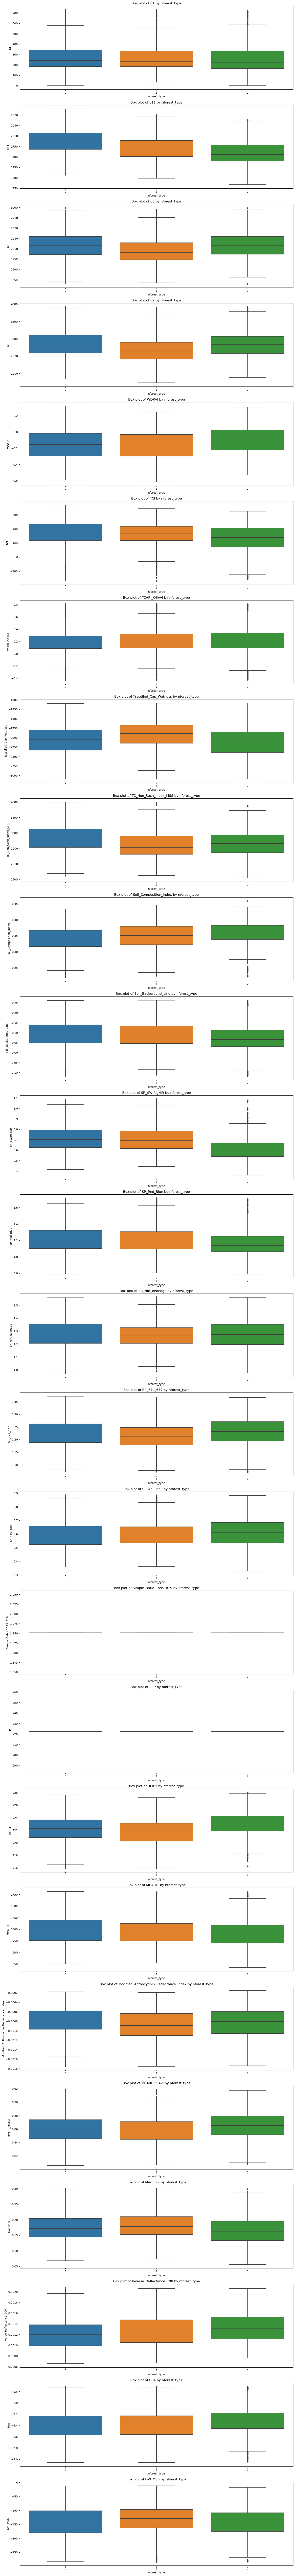

In [29]:
# Assuming df is your DataFrame and 'target' is the name of the target column
target_column = 'nforest_type'  # Replace with your actual target column name

# Function to remove outliers based on IQR
def remove_outliers(df, feature_columns):
    for col in feature_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Get the list of feature columns
feature_columns = [col for col in df_reduced.columns if col != target_column]

# Remove outliers from the DataFrame
df_reduced_cleaned = remove_outliers(df_reduced, feature_columns)

# Set up the matplotlib figure
plt.figure(figsize=(15, len(feature_columns) * 5))

# Create a box plot for each feature
for i, feature in enumerate(feature_columns):
    plt.subplot(len(feature_columns), 1, i + 1)
    sns.boxplot(x=target_column, y=feature, data=df_reduced_cleaned)
    plt.title(f'Box plot of {feature} by {target_column}')

# Adjust layout
plt.tight_layout()
plt.show()

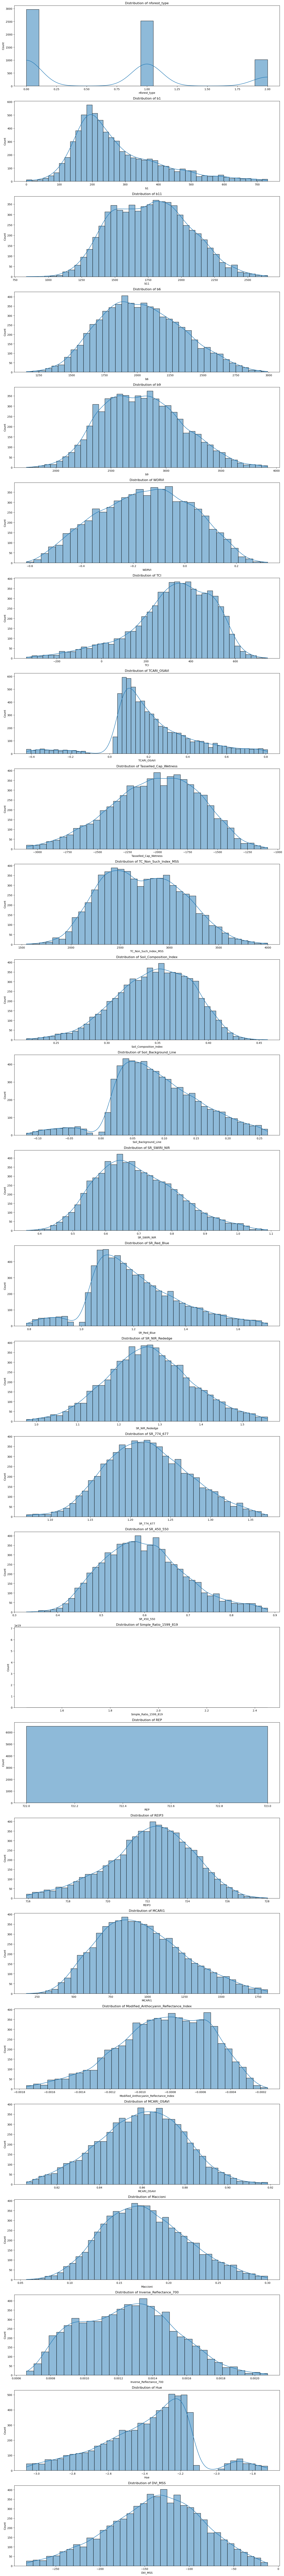

In [30]:

# Set up the matplotlib figure
plt.figure(figsize=(15, len(df_reduced_cleaned.columns) * 5))

# Create a distribution plot for each column
for i, column in enumerate(df_reduced_cleaned.columns):
    plt.subplot(len(df_reduced_cleaned.columns), 1, i + 1)
    sns.histplot(df_reduced_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [41]:
df_reduced_cleaned.columns

Index(['nforest_type', 'b1', 'b11', 'b6', 'b9', 'WDRVI', 'TCI', 'TCARI_OSAVI',
       'Tasselled_Cap_Wetness', 'TC_Non_Such_Index_MSS',
       'Soil_Composition_Index', 'Soil_Background_Line', 'SR_SWIRI_NIR',
       'SR_Red_Blue', 'SR_NIR_Rededge', 'SR_774_677', 'SR_450_550',
       'Simple_Ratio_1599_819', 'REP', 'REIP3', 'MCARI1',
       'Modified_Anthocyanin_Reflectance_Index', 'MCARI_OSAVI', 'Maccioni',
       'Inverse_Reflectance_700', 'Hue', 'DVI_MSS'],
      dtype='object')

In [42]:
df_reduced_cleaned = df_reduced_cleaned.drop(columns=["REP", "Simple_Ratio_1599_819"])

In [43]:
df_reduced_cleaned.shape

(6512, 25)

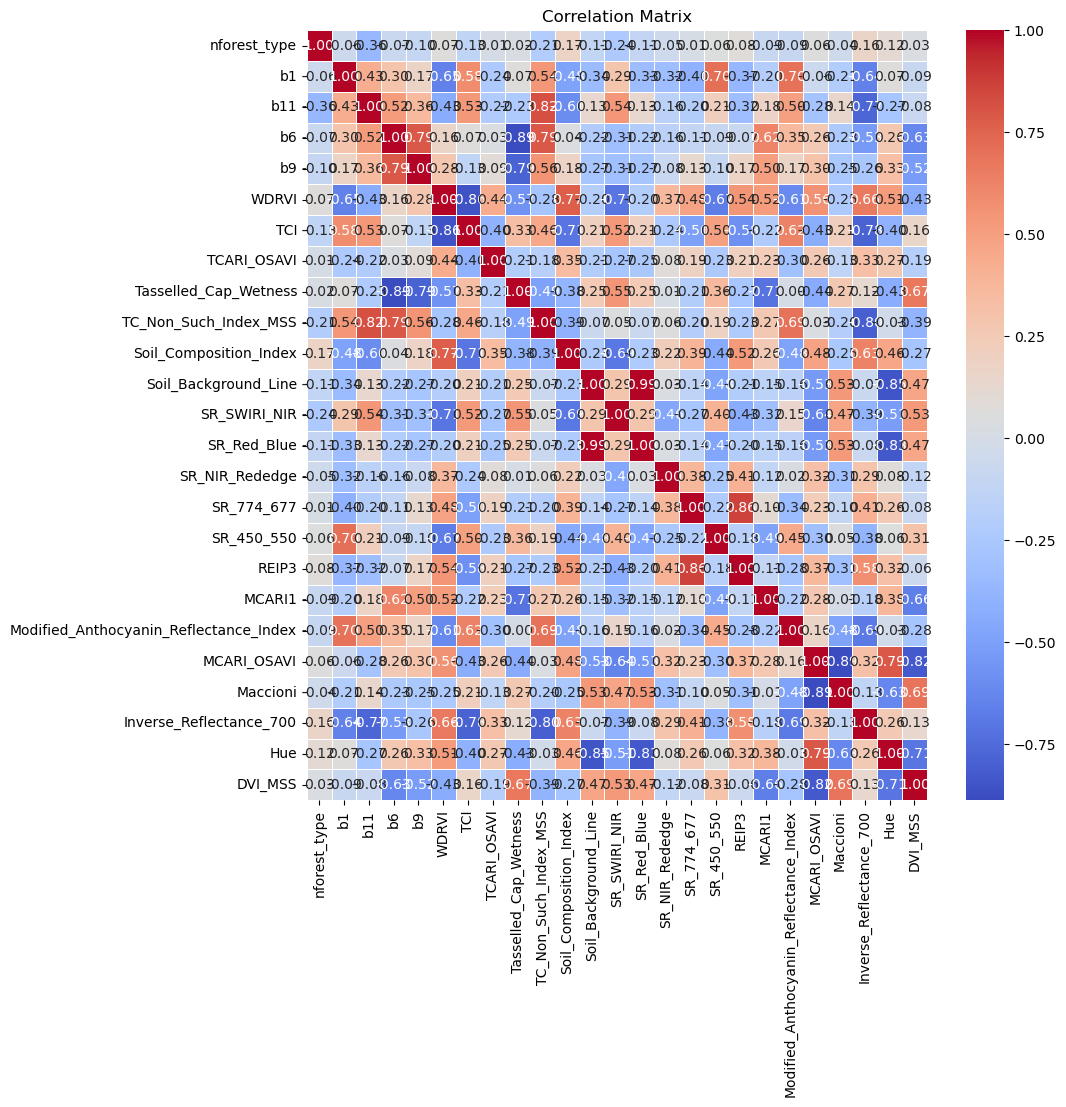

In [44]:
# Compute the correlation matrix
correlation_matrix = df_reduced_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10)) 

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [45]:
df_reduced_cleaned.to_csv("../Data/new_super_reduced.csv", index=False)